In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
benchmark = pd.read_csv("2_benchmark/benchmark.csv",sep=";")

In [3]:
benchmark.shape

(174495, 7)

In [4]:
benchmark = benchmark[benchmark['Demanda Reactiva']!="-"]

In [5]:
def format_df(df):  # dar formato para analisis posterior
    df["Instalación"]       = df["Instalación"].astype('str') 
    df["Data"]              = df["Data"].astype('str')
    df["Data"]              = pd.to_datetime(df["Data"],dayfirst=True)
    df["Demanda Activa"]    = df["Demanda Activa"].astype('str')
    df["Demanda Reactiva"]  = df["Demanda Reactiva"].astype('str')
    df["Unidad"]            = df["Unidad"].astype('str')
    df["Unidad.1"]          = df["Unidad.1"].astype('str')
    df["TOU"]               = df["TOU"].astype('str')
    df["Demanda Activa"]    = df["Demanda Activa"].apply(lambda x: x.replace(',','.'))
    df["Demanda Reactiva"]  = df["Demanda Reactiva"].apply(lambda x: x.replace(',','.'))
    df["Demanda Activa"]    = pd.to_numeric(df["Demanda Activa"])
    df["Demanda Reactiva"]  = df["Demanda Reactiva"].astype('float64')
    df["Potencia aparente"] = np.sqrt(df["Demanda Activa"]**2 + df["Demanda Reactiva"]**2)
    # columnas timestamp
    #df["day"]     = df["Data"].apply(lambda x : x.day)
    #df["month"]   = df["Data"].apply(lambda x : x.month)
    #df["year"]    = df["Data"].apply(lambda x : x.year)
    #df["hour"]    = df["Data"].apply(lambda x : x.hour)
    #df["minute"]  = df["Data"].apply(lambda x : x.minute)
    
    
def plot_pot_ap(df,pprom,title):
    plt.figure(figsize=(16,9))
    plt.title(title)
    plt.plot(df["Data"],df["Potencia aparente"],alpha=0.2,color='blue',label="Potecia aparente")
    plt.plot(df["Data"],pprom*np.ones(df["Data"].size),color='blue',label="Potencia promedio: "+str(pprom)+" [KW]")
    plt.legend()
    
def plot_pot_act_rea(df,p_rea,title):
    plt.figure(figsize=(16,9))
    plt.title(title)
    #plt.plot(df["Data"],df["Demanda Activa"],alpha=0.2,color="green")
    plt.plot(df["Data"],df["Demanda Reactiva"],alpha=0.2,color="red")
    #plt.plot(df["Data"],p_act*np.ones(df["Data"].size),color='green',label="Potencia promedio: "+str(p_act)+" [KW]")
    plt.plot(df["Data"],p_rea*np.ones(df["Data"].size),color='red',label="Potencia promedio: "+str(p_rea)+" [KVAR]")
    plt.legend()
    


In [6]:
format_df(benchmark)

In [7]:
benchmark.dtypes

Instalación                  object
Data                 datetime64[ns]
Demanda Activa              float64
Unidad                       object
Demanda Reactiva            float64
Unidad.1                     object
TOU                          object
Potencia aparente           float64
dtype: object

In [36]:
benchmark.head()

,Instalación,Data,Demanda Activa,Unidad,Demanda Reactiva,Unidad.1,TOU,Potencia aparente
0,A,2019-07-01 00:15:00,2.303,kW,-1.206,kVAr,Fuera de Punta -,2.599662
1,A,2019-07-01 00:30:00,2.306,kW,-1.213,kVAr,Fuera de Punta -,2.605572
2,A,2019-07-01 00:45:00,2.244,kW,-1.260,kVAr,Fuera de Punta -,2.573545
3,A,2019-07-01 01:00:00,1.775,kW,-1.124,kVAr,Fuera de Punta -,2.100952
4,A,2019-07-01 01:15:00,1.456,kW,-1.045,kVAr,Fuera de Punta -,1.792194


In [8]:
instalaciones = benchmark.Instalación.unique()

lista = []
for i in instalaciones:
    benchmark[benchmark.Instalación == i]
    mean_pact  = benchmark[benchmark.Instalación == i]["Demanda Activa"].mean()
    mean_prea  = benchmark[benchmark.Instalación == i]["Demanda Reactiva"].mean()
    mean_pap   = benchmark[benchmark.Instalación == i]["Potencia aparente"].mean()
    if mean_pap == 0:
        eficiencia = 0
    else:
        eficiencia = mean_pact/mean_pap
    obs = [i,mean_pact,mean_prea,mean_pap,eficiencia]
    lista.append(obs)

In [9]:
df_prom = pd.DataFrame(lista,columns=["Instalacion","Demanda Activa","Demanda Reactiva","Potencia aparente","FP"])
df_prom

,Instalacion,Demanda Activa,Demanda Reactiva,Potencia aparente,FP
0,A,5.555045,-0.124185,5.851637,0.949315
1,B,10.210556,-4.060052,12.366853,0.825639
2,C,8.184904,3.906200,9.187346,0.890889
3,D,7.604858,-2.029681,7.885380,0.964425
4,E,6.529587,-2.203247,7.110648,0.918283
5,F,16.344962,-1.298673,16.789171,0.973542
6,G,11.116994,3.387697,15.483291,0.717999
7,H,10.814162,-0.190210,11.426133,0.946441
8,I,28.314384,-29.929839,44.876132,0.630945
9,J,7.463866,2.034685,7.854301,0.950290


In [10]:
df_prom["Potencia aparente"].mean()

11.940418313514781

In [11]:
df_prom["Demanda Activa"].mean()

10.179673248699336

In [12]:
df_prom["Demanda Reactiva"].mean()

-1.874740867069778

In [35]:
p_prom_ap = df_prom["Potencia aparente"].mean()
p_prom_ac = df_prom["Demanda Activa"].mean()
p_prom_re = df_prom["Demanda Reactiva"].mean()
p_prom_fp = df_prom["FP"].mean()

In [65]:
def plot_bar_pot(instalaciones,data,prom,title,u,label,color):
    plt.figure(figsize=(16,9))
    plt.bar(instalaciones,data,label=label,alpha= 0.4,color=color)
    plt.plot(instalaciones,data.mean()*np.ones(data.size),color=color,label="Promedio: "+str(round(prom,3))+" ["+u+"]")
    plt.legend()
    plt.title(title)
    plt.xlabel("Instalaciones")
    plt.ylabel("Potencia")
    plt.xticks(rotation= 90)
    
def plot_bar_fp(instalaciones,data,prom,title,color):
    plt.figure(figsize=(16,9))
    plt.bar(instalaciones,data,label="Factor de potencia",alpha= 0.4,color=color)
    plt.plot(instalaciones,data.mean()*np.ones(data.size),color=color,label="Promedio: "+str(round(prom,3)))
    plt.legend()
    plt.title(title)
    plt.xlabel("Instalaciones")
    plt.xticks(rotation= 90)

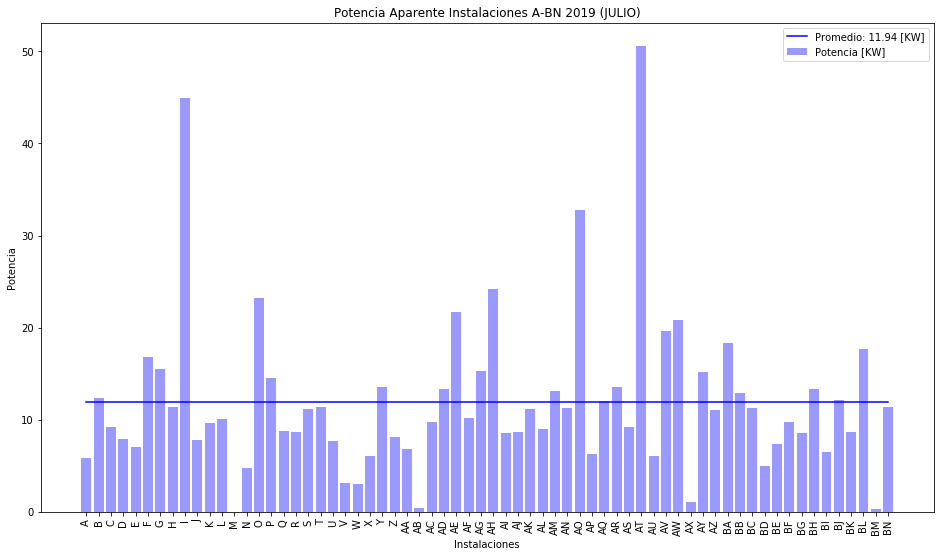

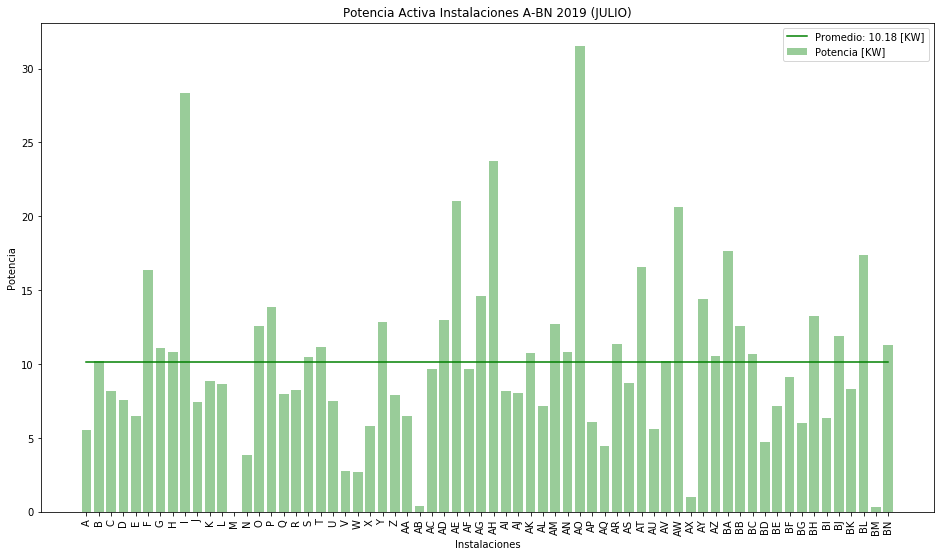

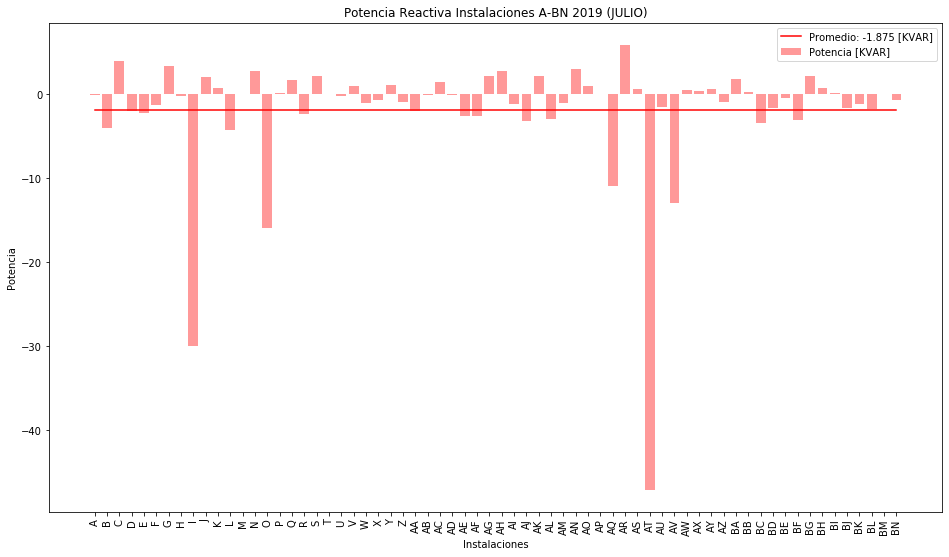

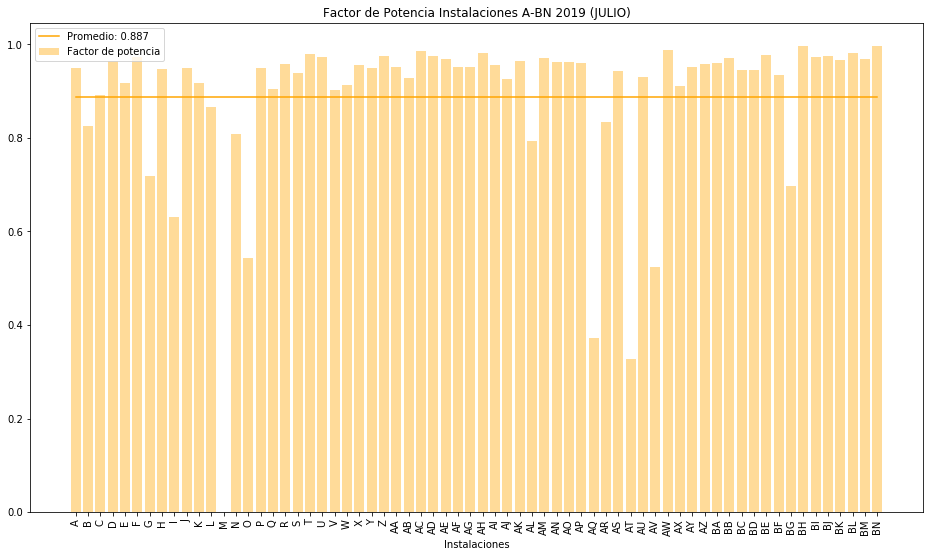

In [66]:
plot_bar_pot(df_prom["Instalacion"],df_prom["Potencia aparente"],p_prom_ap,"Potencia Aparente Instalaciones A-BN 2019 (JULIO)","KW","Potencia [KW]","blue")
plot_bar_pot(df_prom["Instalacion"],df_prom["Demanda Activa"],p_prom_ac,"Potencia Activa Instalaciones A-BN 2019 (JULIO)","KW","Potencia [KW]","green")
plot_bar_pot(df_prom["Instalacion"],df_prom["Demanda Reactiva"],p_prom_re,"Potencia Reactiva Instalaciones A-BN 2019 (JULIO)","KVAR","Potencia [KVAR]","red")
plot_bar_fp(df_prom["Instalacion"],df_prom["FP"],p_prom_fp,"Factor de Potencia Instalaciones A-BN 2019 (JULIO)","orange")

Text(0, 0.5, 'Potencia')

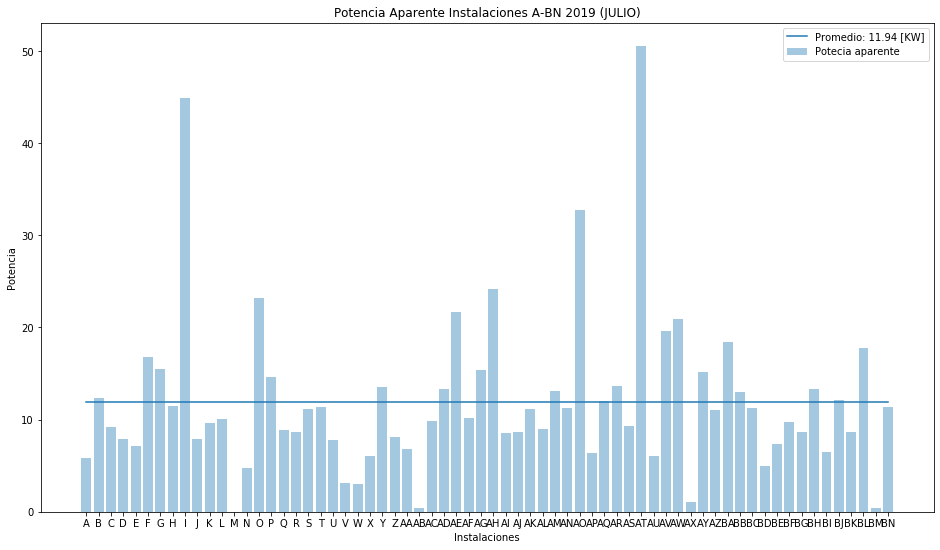

In [43]:
plt.figure(figsize=(16,9))
#plt.bar(df_prom["Instalacion"],df_prom["Demanda Activa"],label="Potecia aparente")
plt.bar(df_prom["Instalacion"],df_prom["Potencia aparente"],label="Potecia aparente",alpha= 0.4)
plt.plot(df_prom["Instalacion"],df_prom["Potencia aparente"].mean()*np.ones(df_prom.shape[0]),label="Promedio: "+str(round(p_prom_ap,3))+" [KW]")
plt.legend()
plt.title("Potencia Aparente Instalaciones A-BN 2019 (JULIO)")
plt.xlabel("Instalaciones")
plt.ylabel("Potencia")
#plt.bar(df_prom["Instalacion"],df_prom["Demanda Reactiva"],label="Potecia aparente")
#plt.bar(df_prom["Instalacion"],df_prom["FP"],label="Potecia aparente")

D:\Program Files\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


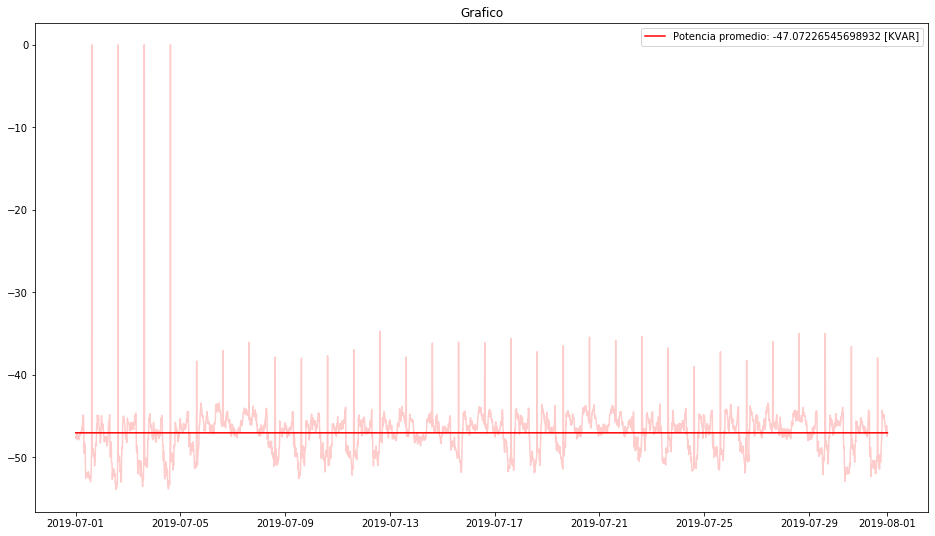

In [44]:
plot_pot_act_rea(benchmark[benchmark.Instalación == "AT"],benchmark[benchmark.Instalación == "AT"]["Demanda Reactiva"].mean(),"Grafico")

In [13]:
benchmark[benchmark.Instalación == "M"]

,Instalación,Data,Demanda Activa,Unidad,Demanda Reactiva,Unidad.1,TOU,Potencia aparente
33133,M,2019-07-01 00:15:00,0.0,kW,0.0,kVAr,Fuera de Punta -,0.0
33134,M,2019-07-01 00:30:00,0.0,kW,0.0,kVAr,Fuera de Punta -,0.0
33135,M,2019-07-01 00:45:00,0.0,kW,0.0,kVAr,Fuera de Punta -,0.0
33136,M,2019-07-01 01:00:00,0.0,kW,0.0,kVAr,Fuera de Punta -,0.0
33137,M,2019-07-01 01:15:00,0.0,kW,0.0,kVAr,Fuera de Punta -,0.0
33138,M,2019-07-01 01:30:00,0.0,kW,0.0,kVAr,Fuera de Punta -,0.0
33139,M,2019-07-01 01:45:00,0.0,kW,0.0,kVAr,Fuera de Punta -,0.0
33140,M,2019-07-01 02:00:00,0.0,kW,0.0,kVAr,Fuera de Punta -,0.0
33141,M,2019-07-01 02:15:00,0.0,kW,0.0,kVAr,Fuera de Punta -,0.0
33142,M,2019-07-01 02:30:00,0.0,kW,0.0,kVAr,Fuera de Punta -,0.0
